<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Space X  Falcon 9 First Stage Landing Prediction**


## Assignment:  Machine Learning Prediction


Estimated time needed: **60** minutes


Space X advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is because Space X can reuse the first stage. Therefore if we can determine if the first stage will land, we can determine the cost of a launch. This information can be used if an alternate company wants to bid against space X for a rocket launch.   In this lab, you will create a machine learning pipeline  to predict if the first stage will land given the data from the preceding labs.


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planed. Space X; performs a controlled landing in the oceans.


## Objectives


Perform exploratory  Data Analysis and determine Training Labels

*   create a column for the class
*   Standardize the data
*   Split into training data and test data

\-Find best Hyperparameter for SVM, Classification Trees and Logistic Regression

*   Find the method performs best using test data


## Import Libraries and Define Auxiliary Functions


In [82]:
import piplite
await piplite.install(['numpy'])
await piplite.install(['pandas'])
await piplite.install(['seaborn'])

We will import the following libraries for the lab


In [83]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier

This function is to plot the confusion matrix.


In [84]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed']) 
    plt.show() 

## Load the dataframe


Load the data


In [85]:
from js import fetch
import io

URL1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
resp1 = await fetch(URL1)
text1 = io.BytesIO((await resp1.arrayBuffer()).to_py())
data = pd.read_csv(text1)

In [86]:
data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [87]:
URL2 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'
resp2 = await fetch(URL2)
text2 = io.BytesIO((await resp2.arrayBuffer()).to_py())
X = pd.read_csv(text2)

In [88]:
X.head(100)

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86.0,15400.000000,2.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
86,87.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
87,88.0,15400.000000,6.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
88,89.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


In [89]:
space_x_data = pd.DataFrame(X)

# Calculate the correlation matrix
correlation_matrix = space_x_data.corr()

# Print the correlation matrix
print(correlation_matrix)

               FlightNumber  PayloadMass   Flights     Block  ReusedCount  \
FlightNumber       1.000000     0.596307  0.652842  0.932411     0.735193   
PayloadMass        0.596307     1.000000  0.665218  0.518165     0.612327   
Flights            0.652842     0.665218  1.000000  0.519603     0.684802   
Block              0.932411     0.518165  0.519603  1.000000     0.743340   
ReusedCount        0.735193     0.612327  0.684802  0.743340     1.000000   
...                     ...          ...       ...       ...          ...   
GridFins_True      0.442364     0.258011  0.194457  0.438023     0.410324   
Reused_False      -0.635844    -0.468393 -0.782631 -0.548036    -0.594109   
Reused_True        0.635844     0.468393  0.782631  0.548036     0.594109   
Legs_False        -0.373619    -0.192318 -0.157727 -0.368994    -0.375496   
Legs_True          0.373619     0.192318  0.157727  0.368994     0.375496   

               Orbit_ES-L1     Orbit_GEO  Orbit_GTO  Orbit_HEO  Orbit_ISS  

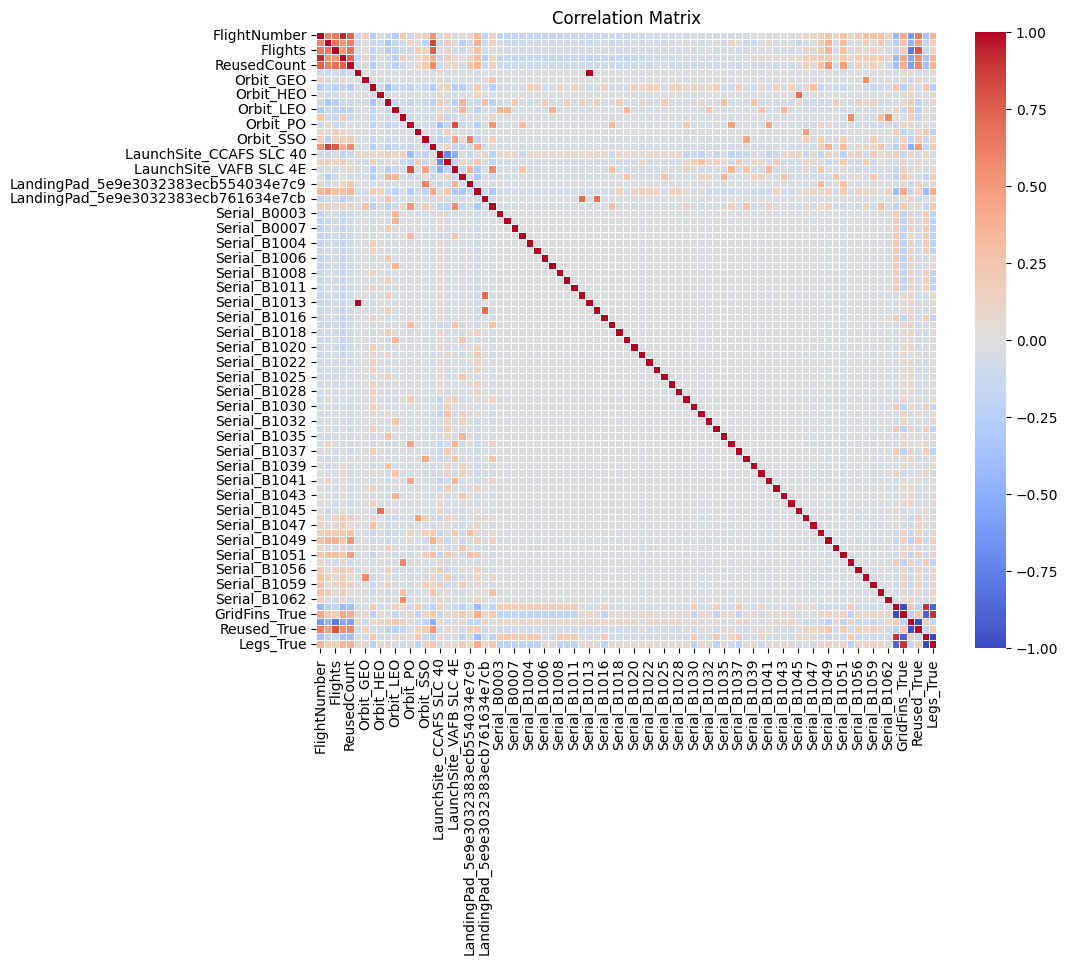

In [90]:
# Assuming 'correlation_matrix' is your DataFrame with correlation coefficients
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', linewidths=.5)
plt.title("Correlation Matrix")
plt.show()

## TASK  1


Create a NumPy array from the column <code>Class</code> in <code>data</code>, by applying the method <code>to_numpy()</code>  then
assign it  to the variable <code>Y</code>,make sure the output is a  Pandas series (only one bracket df\['name of  column']).


In [91]:
# Create a NumPy array from the column Class in data dataframe.
# Apply the method to_numpy() then assign it to the variable Y. Ensure output is a panda series (actually an array).
Y = data['Class'].to_numpy()

# Verify the type of Y is a Pandas Array 
# Assuming the question actually meant array and not series, otherwise it would ask us to use the pd.Series() function.
if isinstance(Y, np.ndarray):
    print("Y is a NumPy array.")
else:
    print("Y is not a NumPy array.")

# Now Y contains the values from the 'Class' column as a NumPy array, and it is verified as a Pandas Array.


Y is a NumPy array.


## TASK  2


Standardize the data in <code>X</code> then reassign it to the variable  <code>X</code> using the transform provided below.


In [92]:
# students get this 
transform = preprocessing.StandardScaler()

# Standardize the data in X and assign it back to X
X = transform.fit_transform(X)

# Validate that the standardization has worked
mean_after_standardization = np.mean(X, axis=0)
std_dev_after_standardization = np.std(X, axis=0)

print("Mean after standardization:", mean_after_standardization)
print("Standard deviation after standardization:", std_dev_after_standardization)

# means and standard deviations close to zero are indicators of effective standardisation. 

Mean after standardization: [ 1.48029737e-17 -1.41861831e-16 -7.27812872e-17 -1.97372982e-17
  5.92118946e-17 -4.81096644e-17 -2.86807615e-17 -7.40148683e-18
 -4.81096644e-17  4.68760833e-17  6.16790569e-18  0.00000000e+00
 -6.90805438e-17 -2.86807615e-17 -5.24271984e-17  1.78869265e-17
 -8.14163551e-17  2.71387850e-17  5.30439890e-17  5.30439890e-17
 -1.41861831e-17 -1.48029737e-17  6.16790569e-18  3.08395285e-18
 -4.81096644e-17 -4.81096644e-17 -4.81096644e-17 -4.81096644e-17
 -4.81096644e-17 -4.81096644e-17 -4.81096644e-17 -4.81096644e-17
 -4.81096644e-17 -4.81096644e-17 -4.81096644e-17 -4.81096644e-17
 -4.81096644e-17 -4.81096644e-17 -4.81096644e-17 -4.81096644e-17
 -4.81096644e-17 -4.81096644e-17 -4.81096644e-17 -3.70074342e-18
 -4.81096644e-17 -4.81096644e-17 -4.81096644e-17 -4.81096644e-17
 -4.81096644e-17  5.55111512e-18 -4.81096644e-17  5.55111512e-18
  5.55111512e-18 -4.81096644e-17  5.55111512e-18  5.55111512e-18
 -4.81096644e-17 -4.81096644e-17  5.55111512e-18  5.55111512e-

We split the data into training and testing data using the  function  <code>train_test_split</code>.   The training data is divided into validation data, a second set used for training  data; then the models are trained and hyperparameters are selected using the function <code>GridSearchCV</code>.


## TASK  3


Use the function train_test_split to split the data X and Y into training and test data. Set the parameter test_size to  0.2 and random_state to 2. The training data and test data should be assigned to the following labels.


<code>X_train, X_test, Y_train, Y_test</code>


In [93]:
# Split the dataset into training and testing sets using the train_test_split function.
# Set test_size to 0.2 and random_state to 2
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
# Print the shapes of the training and testing sets to check the sizes.
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)


# Use train_test_split to split the data into training and test sets
# Set test_size to 0.2 and random_state to 2
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

# Now X_train and Y_train are the training data and labels, and X_test and Y_test are the test data and labels.

Train set: (72, 83) (72,)
Test set: (18, 83) (18,)


we can see we only have 18 test samples.


In [94]:
Y_test.shape

(18,)

## TASK  4


Create a logistic regression object  then create a  GridSearchCV object  <code>logreg_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [95]:
# Create a logistic regression object
lr = LogisticRegression()

# Define the parameters for grid search
parameters = {'C': [0.01, 0.1, 1],
              'penalty': ['l2'],
              'solver': ['lbfgs']}

# Create a GridSearchCV object with cross-validation (cv) set to 10
logreg_cv = GridSearchCV(lr, parameters, cv=10)

# Fit the GridSearchCV object to find the best parameters
logreg_cv.fit(X, Y)

# Create a GridSearchCV object with cross-validation (cv) set to 10
logreg_cv = GridSearchCV(lr, parameters, cv=10)

# Fit the GridSearchCV object to find the best parameters
logreg_cv.fit(X, Y)




GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']})

We output the <code>GridSearchCV</code> object for logistic regression. We display the best parameters using the data attribute <code>best_params\_</code> and the accuracy on the validation data using the data attribute <code>best_score\_</code>.


In [96]:
# Print the best parameters and accuracy after fitting the model
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.8222222222222222


## TASK  5


Calculate the accuracy on the test data using the method <code>score</code>:


In [97]:
# Calculate the accuracy on the log reg test data
accuracy_on_logreg_test = logreg_cv.score(X_test, Y_test)

# Print the accuracy on the log reg test data
print("Accuracy on LogReg Test Data:", accuracy_on_logreg_test)

Accuracy on LogReg Test Data: 0.9444444444444444


Lets look at the confusion matrix:


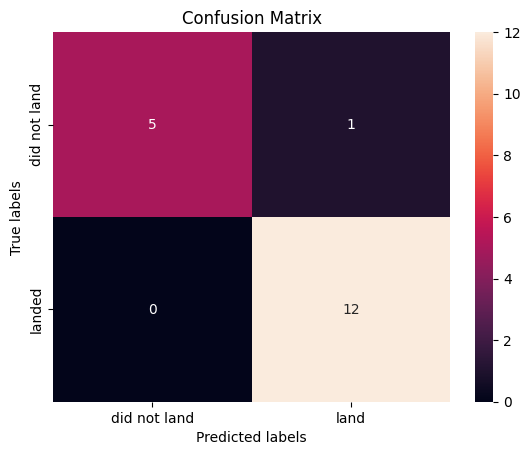

In [98]:
# Make predictions on the test data
yhat=logreg_cv.predict(X_test)

# Plot the confusion matrix
plot_confusion_matrix(Y_test,yhat)


Examining the confusion matrix, we see that logistic regression can distinguish between the different classes.  We see that the major problem is false positives.


## TASK  6


Create a support vector machine object then  create a  <code>GridSearchCV</code> object  <code>svm_cv</code> with cv - 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [99]:
# Create a Support Vector Machine (SVM) object
svm = SVC()

# Define the parameters for grid search
parameters = {'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
              'C': np.logspace(-3, 3, 5),
              'gamma': np.logspace(-3, 3, 5)}

# Create a GridSearchCV object with cross-validation (cv) set to 10
svm_cv = GridSearchCV(svm, parameters, cv=10)

# Fit the GridSearchCV object to find the best parameters
svm_cv.fit(X, Y)



GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'gamma': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']})

In [100]:
# Print the best parameters and accuracy after fitting the model
print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}
accuracy : 0.8222222222222223


## TASK  7


Calculate the accuracy on the test data using the method <code>score</code>:


In [101]:
# Calculate the accuracy on the svm test data
accuracy_on_SVM_test = svm_cv.score(X_test, Y_test)

# Print the accuracy on the svm test data
print("Accuracy on SVM Test Data:", accuracy_on_SVM_test)

Accuracy on SVM Test Data: 0.9444444444444444


We can plot the confusion matrix


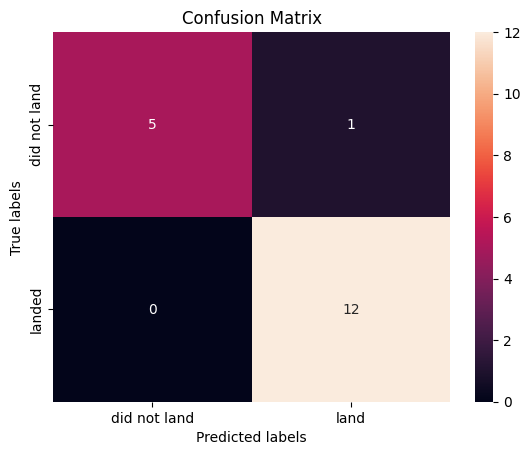

In [102]:
# Make predictions on the test data
yhat=svm_cv.predict(X_test)
# Plot the confusion matrix
plot_confusion_matrix(Y_test,yhat)

In [103]:
# Assuming svm_cv is your GridSearchCV object
best_kernel = svm_cv.best_params_['kernel']
print(f"The best-performing kernel on the validation dataset is: {best_kernel}")


The best-performing kernel on the validation dataset is: sigmoid


## TASK  8


Create a decision tree classifier object then  create a  <code>GridSearchCV</code> object  <code>tree_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [104]:
# Create a Decision Tree classifier object
tree = DecisionTreeClassifier()

# Define the parameters for grid search
parameters = {'criterion': ['gini', 'entropy'],
              'splitter': ['best', 'random'],
              'max_depth': [2 * n for n in range(1, 10)],
              'max_features': ['sqrt'], # Explicitly set max_features to 'sqrt'
              'min_samples_leaf': [1, 2, 4],
              'min_samples_split': [2, 5, 10]}

# Create a GridSearchCV object with cross-validation (cv) set to 10
tree_cv = GridSearchCV(tree, parameters, cv=10)

# Fit the GridSearchCV object to find the best parameters
tree_cv.fit(X, Y)


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'max_features': ['sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [105]:
# Print the best parameters and accuracy after fitting the model
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': 6, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'splitter': 'random'}
accuracy : 0.8777777777777779


## TASK  9


Calculate the accuracy of tree_cv on the test data using the method <code>score</code>:


In [106]:
# Calculate the accuracy on the test data
accuracy_on_tree_test = tree_cv.score(X_test, Y_test)

# Print the accuracy on the test data
print("Accuracy on Decision Tree Test Data:", accuracy_on_tree_test)

Accuracy on Decision Tree Test Data: 0.8333333333333334


We can plot the confusion matrix


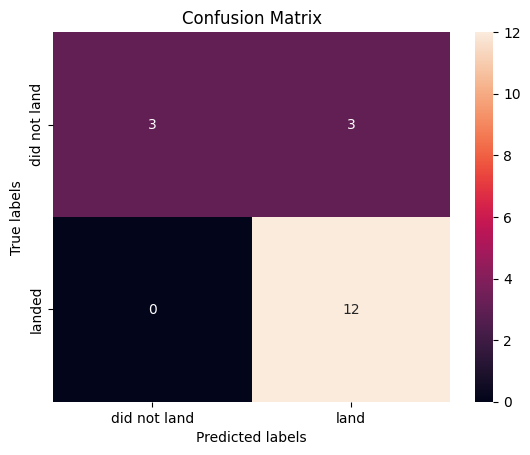

In [107]:
# Make predictions on the tree test data
yhat = tree_cv.predict(X_test)
# Plot the confusion matrix
plot_confusion_matrix(Y_test,yhat)

## TASK  10


Create a k nearest neighbors object then  create a  <code>GridSearchCV</code> object  <code>knn_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [108]:
# Create a k-Nearest Neighbors (KNN) object
KNN = KNeighborsClassifier()

# Define the parameters for grid search
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1, 2]}

# Create a GridSearchCV object with cross-validation (cv) set to 10
knn_cv = GridSearchCV(KNN, parameters, cv=10)

# Fit the GridSearchCV object to find the best parameters
knn_cv.fit(X, Y)


GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]})

In [109]:
# Print the best parameters and accuracy after fitting the model
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 5, 'p': 1}
accuracy : 0.8444444444444444


## TASK  11


Calculate the accuracy of knn_cv on the test data using the method <code>score</code>:


In [110]:
# Calculate the accuracy on the KNN test data
accuracy_on_knn_test = knn_cv.score(X_test, Y_test)

# Print the accuracy on the test data
print("Accuracy on KNN Test Data:", accuracy_on_knn_test)

Accuracy on KNN Test Data: 0.9444444444444444


We can plot the confusion matrix


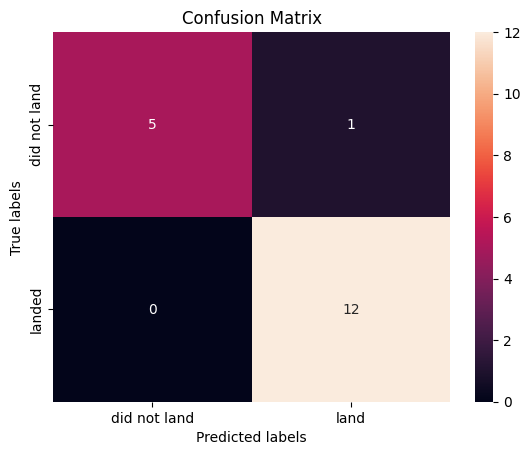

In [111]:
# Make predictions on the knn test data
yhat = knn_cv.predict(X_test)
# Plot the confusion matrix
plot_confusion_matrix(Y_test,yhat)

## TASK  12


Find the method performs best:


In [112]:
# After training and evaluating the three models: logreg_cv, svm_cv, tree_cv, and knn_cv
# Evaluate Logistic Regression on the test data
accuracy_on_logreg_test = logreg_cv.score(X_test, Y_test)
print("Accuracy on Logistic Regression Test Data:", accuracy_on_logreg_test)

# Evaluate Support Vector Machine on the test data
accuracy_on_svm_test = svm_cv.score(X_test, Y_test)
print("Accuracy on Support Vector Machine Test Data:", accuracy_on_svm_test)

# Evaluate Decision Tree on the test data
accuracy_on_tree_test = tree_cv.score(X_test, Y_test)
print("Accuracy on Decision Tree Test Data:", accuracy_on_tree_test)

# Evaluate K-Nearest Neighbors on the test data
accuracy_on_knn_test = knn_cv.score(X_test, Y_test)
print("Accuracy on K-Nearest Neighbors Test Data:", accuracy_on_knn_test)

# Find models with the highest accuracy on the test data
best_models_test = [(accuracy_on_logreg_test, 'Logistic Regression'),
                    (accuracy_on_svm_test, 'Support Vector Machine'),
                    (accuracy_on_tree_test, 'Decision Tree'),
                    (accuracy_on_knn_test, 'K-Nearest Neighbors')]

max_accuracy = max([model[0] for model in best_models_test])

best_models = [model[1] for model in best_models_test if model[0] == max_accuracy]

print("The best-performing model(s) on test data with accuracy", max_accuracy, "is/are:", ', '.join(best_models))



Accuracy on Logistic Regression Test Data: 0.9444444444444444
Accuracy on Support Vector Machine Test Data: 0.9444444444444444
Accuracy on Decision Tree Test Data: 0.8333333333333334
Accuracy on K-Nearest Neighbors Test Data: 0.9444444444444444
The best-performing model(s) on test data with accuracy 0.9444444444444444 is/are: Logistic Regression, Support Vector Machine, K-Nearest Neighbors


So on first inspection, either logistic regression, support vector machine or K-Nearest Nighbor models all perform to the same level of accuracy. Next I look at the overall results of hyperparameter tuning and accuracy scores.

In [113]:

# Get hyperparameter tuning scores
tuning_scores = {
    'Logistic Regression': logreg_cv.best_score_,
    'Support Vector Machine': svm_cv.best_score_,
    'Decision Tree': tree_cv.best_score_,
    'K-Nearest Neighbors': knn_cv.best_score_
}

# Get accuracy on test data
test_accuracies = {
    'Logistic Regression': accuracy_on_logreg_test,
    'Support Vector Machine': accuracy_on_svm_test,
    'Decision Tree': accuracy_on_tree_test,
    'K-Nearest Neighbors': accuracy_on_knn_test
}

# Print all scores
print("Hyperparameter Tuning Scores:")
for model, score in tuning_scores.items():
    print(f"{model}: {score}")

print("\nTest Accuracies:")
for model, accuracy in test_accuracies.items():
    print(f"{model}: {accuracy}")

# Find the model with the highest combined score (tuning + test accuracy)
combined_scores = {model: tuning_scores[model] + test_accuracies[model] for model in tuning_scores}
best_combined_model = max(combined_scores, key=combined_scores.get)

print("\nThe best-performing model (combined score) is:", best_combined_model)
print("Hyperparameter Tuning Score:", tuning_scores[best_combined_model])
print("Accuracy on Test Data:", test_accuracies[best_combined_model])



Hyperparameter Tuning Scores:
Logistic Regression: 0.8222222222222222
Support Vector Machine: 0.8222222222222223
Decision Tree: 0.8777777777777779
K-Nearest Neighbors: 0.8444444444444444

Test Accuracies:
Logistic Regression: 0.9444444444444444
Support Vector Machine: 0.9444444444444444
Decision Tree: 0.8333333333333334
K-Nearest Neighbors: 0.9444444444444444

The best-performing model (combined score) is: K-Nearest Neighbors
Hyperparameter Tuning Score: 0.8444444444444444
Accuracy on Test Data: 0.9444444444444444


So in this context, K-Nearest Neighbor is slightly ahead on a combined score for hyperparameter tuning and accuracy score against the test set. For completeness, I test against the other validation metrics studied in this program.

In [114]:
from sklearn.metrics import accuracy_score, jaccard_score, f1_score, log_loss
import pandas as pd

# Get hyperparameter tuning scores
tuning_scores = {
    'Logistic Regression': logreg_cv.best_score_,
    'Support Vector Machine': svm_cv.best_score_,
    'Decision Tree': tree_cv.best_score_,
    'K-Nearest Neighbors': knn_cv.best_score_
}

# Get predictions for each model on the test set
predictions_logreg = logreg_cv.predict(X_test)
predictions_svm = svm_cv.predict(X_test)
predictions_tree = tree_cv.predict(X_test)
predictions_knn = knn_cv.predict(X_test)

# Calculate validation scores for each model
logreg_accuracy = accuracy_score(Y_test, predictions_logreg)
logreg_jaccard = jaccard_score(Y_test, predictions_logreg)
logreg_f1 = f1_score(Y_test, predictions_logreg)
logreg_log_loss = log_loss(Y_test, logreg_cv.predict_proba(X_test))

svm_accuracy = accuracy_score(Y_test, predictions_svm)
svm_jaccard = jaccard_score(Y_test, predictions_svm)
svm_f1 = f1_score(Y_test, predictions_svm)

tree_accuracy = accuracy_score(Y_test, predictions_tree)
tree_jaccard = jaccard_score(Y_test, predictions_tree)
tree_f1 = f1_score(Y_test, predictions_tree)

knn_accuracy = accuracy_score(Y_test, predictions_knn)
knn_jaccard = jaccard_score(Y_test, predictions_knn)
knn_f1 = f1_score(Y_test, predictions_knn)

# Get accuracy on test data
test_accuracies = {
    'Logistic Regression': logreg_accuracy,
    'Support Vector Machine': svm_accuracy,
    'Decision Tree': tree_accuracy,
    'K-Nearest Neighbors': knn_accuracy
}

# Create a DataFrame to report the metrics
report = pd.DataFrame({
    'Model': ['Logistic Regression', 'Support Vector Machine', 'Decision Tree', 'K-Nearest Neighbors'],
    'Tuning Score': [tuning_scores['Logistic Regression'], tuning_scores['Support Vector Machine'],
                     tuning_scores['Decision Tree'], tuning_scores['K-Nearest Neighbors']],
    'Accuracy': [logreg_accuracy, svm_accuracy, tree_accuracy, knn_accuracy],
    'Jaccard Index': [logreg_jaccard, svm_jaccard, tree_jaccard, knn_jaccard],
    'F1 Score': [logreg_f1, svm_f1, tree_f1, knn_f1],
    'Log Loss': [logreg_log_loss, None, None, None]  # Log Loss is only applicable for LR
})

# Display the metrics DataFrame
print("Metrics for Each Model:")
display(report)

# Find the model with the highest combined score (tuning + test accuracy + new evaluation metrics)
combined_scores = {
    'Logistic Regression': tuning_scores['Logistic Regression'] + logreg_accuracy + logreg_jaccard + logreg_f1 - logreg_log_loss,
    'Support Vector Machine': tuning_scores['Support Vector Machine'] + svm_accuracy + svm_jaccard + svm_f1,
    'Decision Tree': tuning_scores['Decision Tree'] + tree_accuracy + tree_jaccard + tree_f1,
    'K-Nearest Neighbors': tuning_scores['K-Nearest Neighbors'] + knn_accuracy + knn_jaccard + knn_f1
}

best_combined_model = max(combined_scores, key=combined_scores.get)

print("\nThe best-performing model (combined score) is:", best_combined_model)
print("Hyperparameter Tuning Score:", tuning_scores[best_combined_model])
print("Accuracy on Test Data:", test_accuracies[best_combined_model])


Metrics for Each Model:


,Model,Tuning Score,Accuracy,Jaccard Index,F1 Score,Log Loss
0,Logistic Regression,0.822222,0.944444,0.923077,0.960000,0.360438
1,Support Vector Machine,0.822222,0.944444,0.923077,0.960000,NaN
2,Decision Tree,0.877778,0.833333,0.800000,0.888889,NaN
3,K-Nearest Neighbors,0.844444,0.944444,0.923077,0.960000,NaN



The best-performing model (combined score) is: K-Nearest Neighbors
Hyperparameter Tuning Score: 0.8444444444444444
Accuracy on Test Data: 0.9444444444444444


Overall, the best scoring model K-Nearest Neighbor, noting that we can likely use an ensemble approach that uses multiple of these models to predict our answers. For example, the top models here might also be used together with gradient boosting or random forest algorithms to boost accuracy scores.

Below see bar charts for overall accuracy scores for each model, as well as for multiple validation scores for interest.

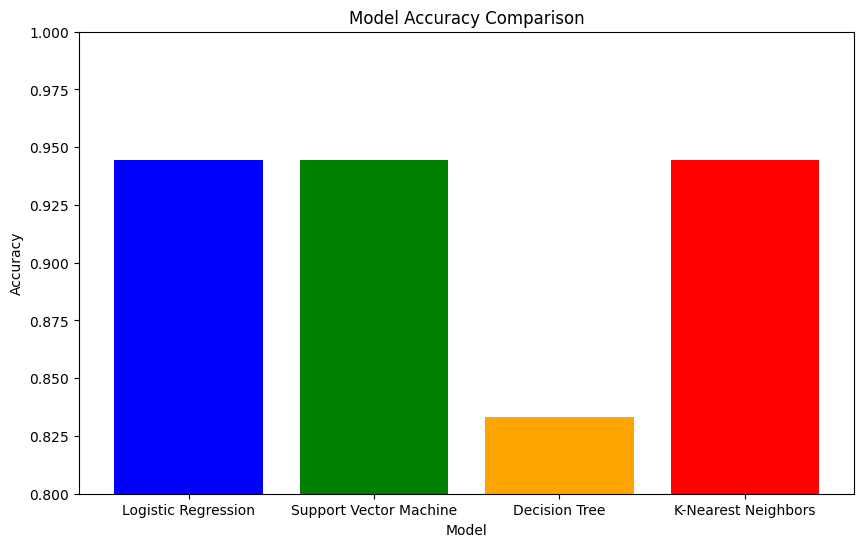

In [115]:
# Extract the model names and their corresponding accuracy scores
model_names = report['Model']
accuracies = report['Accuracy']

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies, color=['blue', 'green', 'orange', 'red'])
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0.8, 1.0)  # Set y-axis limit for better visualization
plt.show()

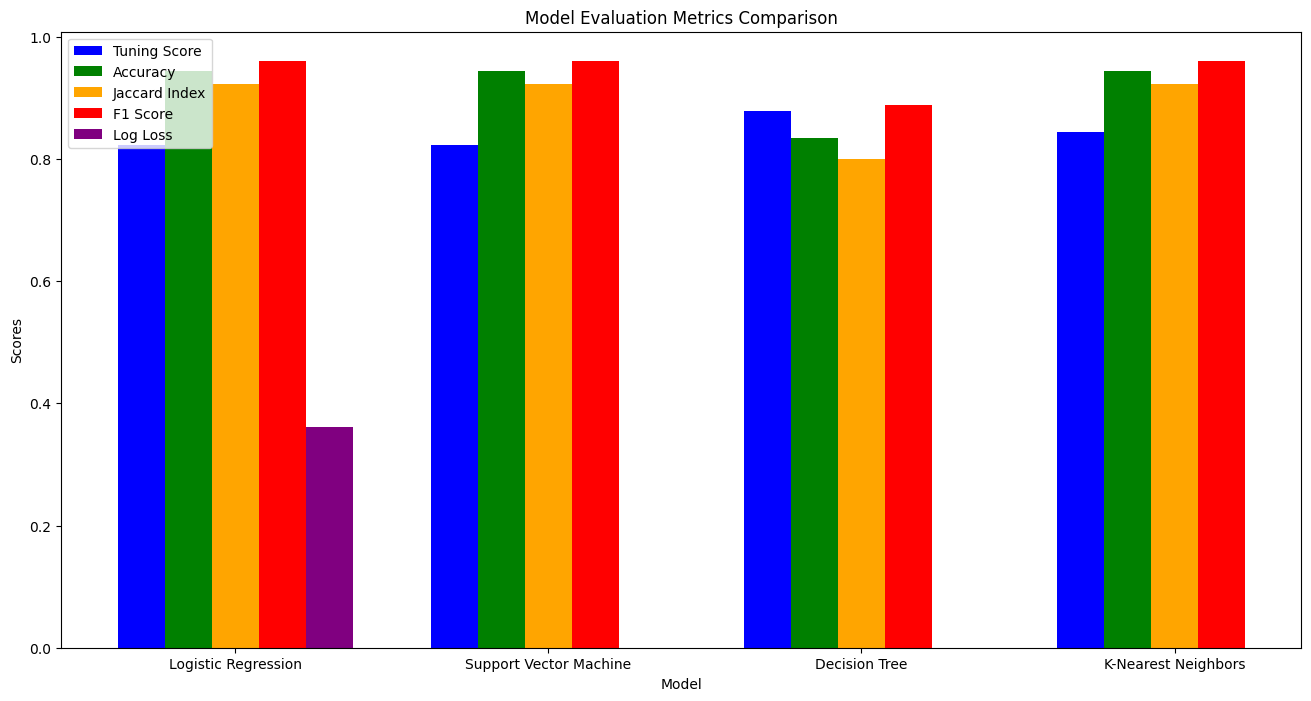

In [ ]:
# Extract the model names and their corresponding scores
model_names = report['Model']
tuning_scores = report['Tuning Score']
accuracies = report['Accuracy']
jaccard_indices = report['Jaccard Index']
f1_scores = report['F1 Score']
log_losses = report['Log Loss']

# Set the bar width
bar_width = 0.15

# Create an array of indices for the models
indices = np.arange(len(model_names))

# Create grouped bar chart
plt.figure(figsize=(16, 8))
bar1 = plt.bar(indices - 2*bar_width, tuning_scores, width=bar_width, label='Tuning Score', color='blue')
bar2 = plt.bar(indices - bar_width, accuracies, width=bar_width, label='Accuracy', color='green')
bar3 = plt.bar(indices, jaccard_indices, width=bar_width, label='Jaccard Index', color='orange')
bar4 = plt.bar(indices + bar_width, f1_scores, width=bar_width, label='F1 Score', color='red')
bar5 = plt.bar(indices + 2*bar_width, log_losses, width=bar_width, label='Log Loss', color='purple')

# Labeling
plt.title('Model Evaluation Metrics Comparison')
plt.xlabel('Model')
plt.ylabel('Scores')
plt.xticks(indices, model_names)
plt.legend()

plt.show()

## Authors


[Pratiksha Verma](https://www.linkedin.com/in/pratiksha-verma-6487561b1/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork865-2023-01-01)


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By      | Change Description      |
| ----------------- | ------- | -------------   | ----------------------- |
| 2022-11-09        | 1.0     | Pratiksha Verma | Converted initial version to Jupyterlite|


### <h3 align="center"> IBM Corporation 2022. All rights reserved. <h3/>
